# Self-Driving Car Advanced Lane Detection

## 1. Camera Calibration

In [21]:
import numpy as np
import cv2
import glob
import math
import matplotlib.pyplot as plt
%matplotlib inline


###  Find corners for calibration images

In [60]:
corner_x = 9 # number of corners in x axis
corner_y = 6 # number of corners in y axis

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane
gray_shape = None

objp = np.zeros((corner_x * corner_y, 3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1, 2)

fnames = glob.glob('camera_cal/calibration*.jpg')
for fname in fnames:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_shape = gray.shape
    ret, corners = cv2.findChessboardCorners(gray, (corner_x, corner_y), None)

    if ret:
        cv2.drawChessboardCorners(img, (corner_x, cornor_y), corners, ret)
        objpoints.append(objp)
        imgpoints.append(corners)

print('{} images have 9 x 6 corners'.format(len(imgpoints)))

17 images have 9 x 6 corners


### Calibrate Camera

In [61]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray_shape[::-1], None, None)

def undistort_img(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

Test undistort function on an example image.

Text(0.5,1,'undistorted image')

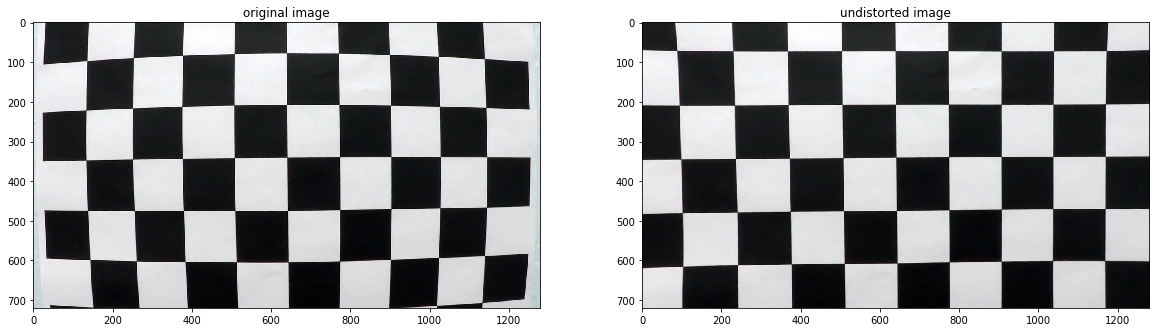

In [66]:
test_img = cv2.imread('camera_cal/calibration1.jpg')
undistorted_img = undistort_img(test_img)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.imshow(test_img)
ax1.set_title('original image')
ax2.imshow(undistorted_img)
ax2.set_title('undistorted image')